# 순서
* store = pd.merge([features, store])
* store 전처리
* train.merge(store)
* test.merge(store)
* X, y split
* Model.fit(X_train, y_train)
* Model.predict(X_test)
* submit

# load data & library

In [792]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [793]:
train = pd.read_csv("../data/MiniP4/train.csv.zip")
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [794]:
test = pd.read_csv("../data/MiniP4/test.csv.zip")
print(test.shape)
test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [795]:
store1 = pd.read_csv("../data/MiniP4/features.csv.zip")
print(store1.shape)
store1.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [796]:
store2 = pd.read_csv("../data/MiniP4/stores.csv")
print(store2.shape)
store2.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# features = pd.merge([features, store])

In [797]:
store = pd.merge(left=store1, right=store2, on="Store")
print(store.shape)
store.sample(5)

(8190, 14)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
6043,34,2010-10-22,58.11,2.736,NaN,NaN,NaN,NaN,NaN,126.381548,10.210,False,A,158114
1643,10,2010-03-12,52.33,3.034,NaN,NaN,NaN,NaN,NaN,126.604286,9.765,False,B,126512
4744,27,2010-04-30,53.55,3.042,NaN,NaN,NaN,NaN,NaN,135.917083,8.058,False,A,204184
2198,13,2010-05-14,50.15,2.962,NaN,NaN,NaN,NaN,NaN,126.208548,8.107,False,A,219622
902,5,2013-06-07,78.40,3.439,4459.39,34.03,46.17,2003.25,1993.02,NaN,NaN,False,B,34875


## "Date" 날짜 타입으로 변경, 연도, 월 추출
* 1주일에 1번 매주 같은 요일에 측정된 데이터로, 일과 요일 추출은 무의미하다 판단 
* 나중에 train이랑 merge 후 연도, 월별 Sales 시각화 해볼 것

In [798]:
store["Date"] = pd.to_datetime(store["Date"])
store["Date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8190 entries, 0 to 8189
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8190 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 128.0 KB


In [799]:
store["year"] = store["Date"].dt.year
store["month"] = store["Date"].dt.month

In [800]:
# store = store.set_index("Date")

In [801]:
store[["year", "month"]].sample(5)

,year,month
2225,2010,11
2224,2010,11
1525,2011,6
3426,2012,12
2449,2011,9


# store 전처리

In [802]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
 14  year          8190 non-null   int64         
 15  month         8190 non-null   int64   

In [803]:
store.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,year,month
299,2,2012-05-04,76.73,3.749,23731.47,NaN,78.09,7931.42,4443.52,221.309517,6.891,False,A,202307,2012,5
4991,28,2011-07-29,93.29,3.805,NaN,NaN,NaN,NaN,NaN,129.167710,13.503,False,A,206302,2011,7
7479,42,2010-06-04,82.82,2.941,NaN,NaN,NaN,NaN,NaN,126.136065,9.524,False,C,39690,2010,6
620,4,2011-07-08,84.59,3.469,NaN,NaN,NaN,NaN,NaN,129.112500,5.644,False,A,205863,2011,7
3274,18,2013-07-19,80.48,3.803,5055.21,291.54,54.10,654.70,1248.79,NaN,NaN,False,B,120653,2013,7


In [804]:
store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year,month
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,130287.600000,2011.351648,6.291209
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,63115.971429,1.041762,3.328046
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000,2010.000000,1.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,70713.000000,2010.000000,3.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,126512.000000,2011.000000,6.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,202307.000000,2012.000000,9.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000,2013.000000,12.000000


## 결측치 비율 조회

In [805]:
store.isnull().mean()

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
Type            0.000000
Size            0.000000
year            0.000000
month           0.000000
dtype: float64

## 소비자 물가 & 실업율 == 시계열 데이터 -> 보간법 사용

In [806]:
store[["CPI", "Unemployment"]].isnull().sum()

CPI             585
Unemployment    585
dtype: int64

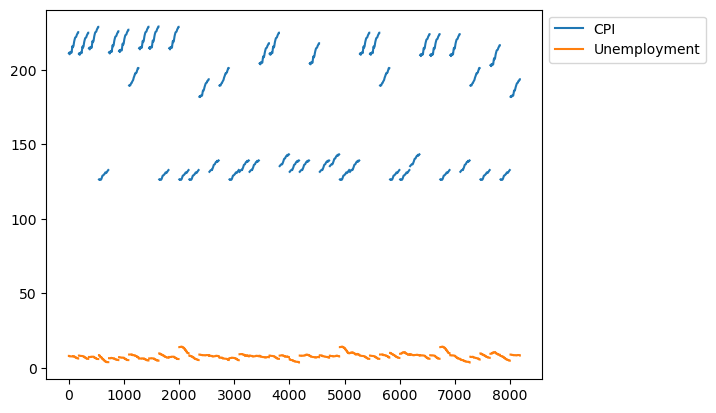

In [808]:
store[["CPI", "Unemployment"]].plot(kind="line", legend=(1, 2))
plt.legend(bbox_to_anchor=(1, 1))

In [809]:
store["CPI_interpolate"] = store["CPI"].interpolate(method="linear", limit_direction="both")
store["Unemployment_interpolate"] = store["Unemployment"].interpolate(method="linear", limit_direction="both")

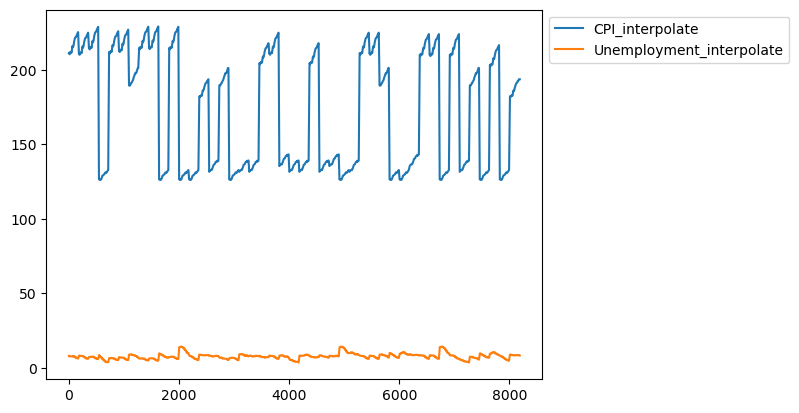

In [810]:
store[["CPI_interpolate", "Unemployment_interpolate"]].plot(kind="line", legend=(1, 2))
plt.legend(bbox_to_anchor=(1, 1))

In [743]:
# MarkDown의 결측치 비율 : 절반 이상, 제거 고려
store[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].isnull().mean()

MarkDown1    0.507692
MarkDown2    0.643346
MarkDown3    0.558852
MarkDown4    0.577045
MarkDown5    0.505495
dtype: float64

## Markdown fillna(0)

In [744]:
store[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]] = store[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].fillna(0)

In [745]:
store = store.drop(["CPI", "Unemployment", "IsHoliday"], axis=1)
store.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
4930,28,2010-05-28,67.84,3.058,0.00,0.00,0.00,0.00,0.00,A,206302,2010,5,126.160226,14.099
5333,30,2011-02-25,61.27,3.065,0.00,0.00,0.00,0.00,0.00,C,42988,2011,2,213.190421,8.028
5003,28,2011-10-21,73.05,3.842,0.00,0.00,0.00,0.00,0.00,A,206302,2011,10,129.782161,12.890
7632,42,2013-05-10,74.59,3.689,148.63,0.00,12.81,0.00,1086.98,C,39690,2013,5,142.765836,7.181
5795,32,2013-01-11,32.50,2.957,3554.32,14035.48,8.77,226.05,2442.72,A,203007,2013,1,200.619091,7.107


## Scaling

In [746]:
store.select_dtypes("number").columns.tolist()

['Store',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Size',
 'year',
 'month',
 'CPI_interpolate',
 'Unemployment_interpolate']

In [747]:
store_num = store[['Temperature', 'Fuel_Price', 'Size', 
                   'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                   'CPI_interpolate', 'Unemployment_interpolate']]

In [748]:
store_num.head()

,Temperature,Fuel_Price,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI_interpolate,Unemployment_interpolate
0,42.31,2.572,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,38.51,2.548,151315,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,39.93,2.514,151315,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,46.63,2.561,151315,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,46.50,2.625,151315,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


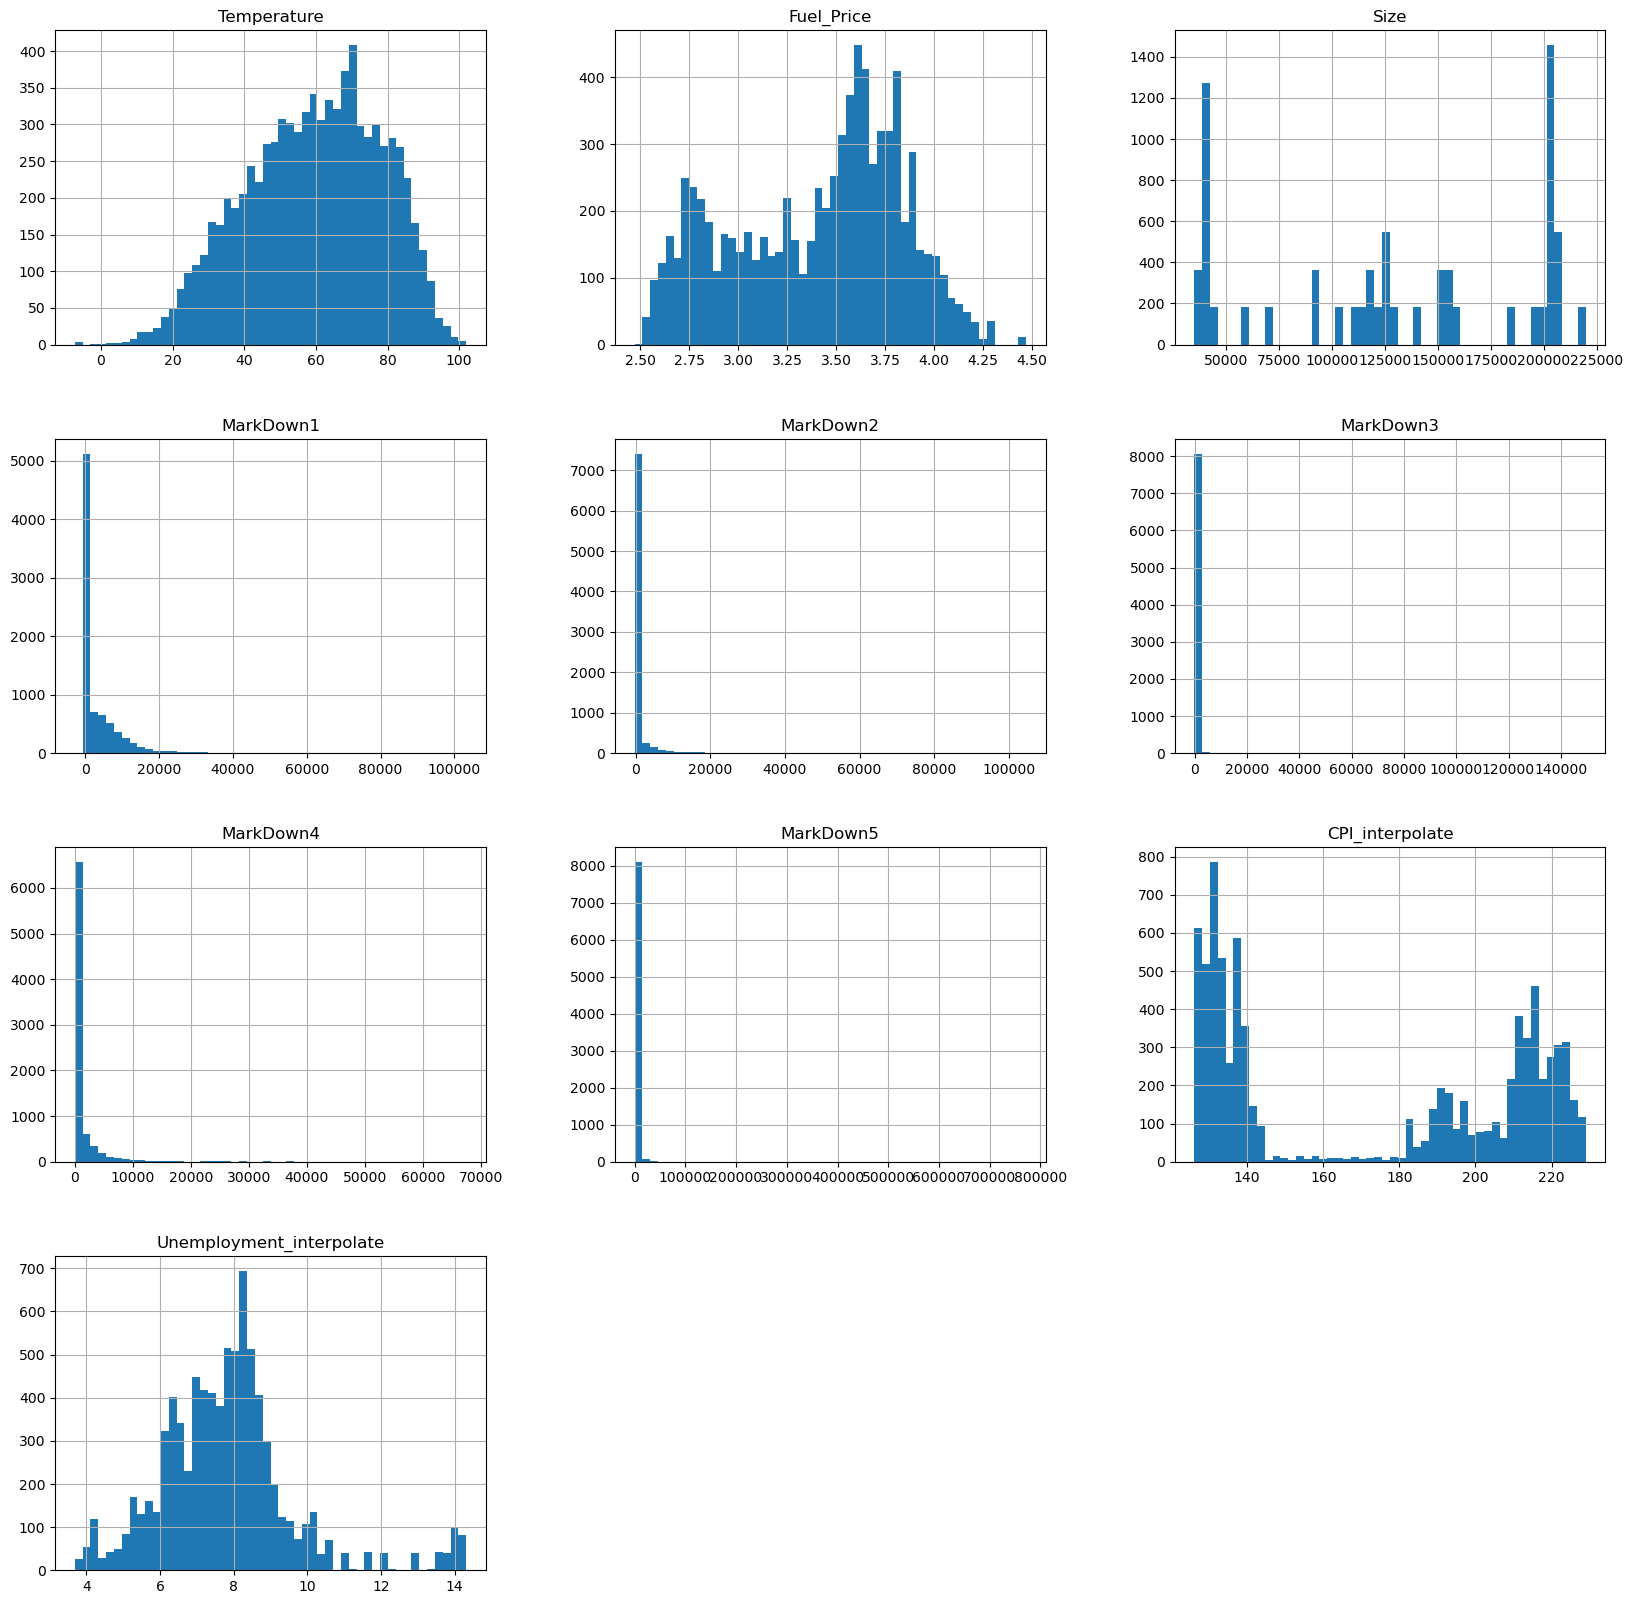

In [749]:
store_num.hist(figsize=(20, 20), bins=50);

In [750]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rbs = RobustScaler()
store_num_scaled = rbs.fit_transform(store_num)

In [751]:
store_num_scaled

array([[-0.65767134, -1.34045584,  0.18848124, ...,  0.        ,
         0.35732923,  0.15625   ],
       [-0.79349477, -1.37464387,  0.18848124, ...,  0.        ,
         0.35912868,  0.15625   ],
       [-0.7427397 , -1.42307692,  0.18848124, ...,  0.        ,
         0.35970837,  0.15625   ],
       ...,
       [ 0.66696453,  0.14387464, -0.06300439, ...,  0.80228482,
         0.14127629,  0.27552083],
       [ 0.79099276,  0.31908832, -0.06300439, ...,  0.39527739,
         0.14127629,  0.27552083],
       [ 0.54865517,  0.41452991, -0.06300439, ...,  0.6956585 ,
         0.14127629,  0.27552083]])

In [752]:
store_num_scaled = pd.DataFrame(store_num_scaled, 
                                columns=['Temperature', 'Fuel_Price', 'Size', 
                                         'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 
                                         'MarkDown5', 'CPI_interpolate', 
                                         'Unemployment_interpolate'])

In [753]:
store_num_scaled.sample(5)

,Temperature,Fuel_Price,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI_interpolate,Unemployment_interpolate
7946,0.060048,0.410256,-0.658100,0.013587,0.000000,0.000000,0.000000,0.156673,-0.630777,-1.138021
2166,0.076847,0.716524,-0.108470,1.620218,0.000000,10.627581,1.016507,0.793174,-0.611493,1.095833
580,0.116165,-1.273504,0.602999,0.000000,0.000000,0.000000,0.000000,0.000000,-0.689942,-0.353646
1489,0.587615,-1.266382,-0.005160,0.000000,0.000000,0.000000,0.000000,0.000000,0.407205,-0.710417
7241,-0.297739,0.433048,0.217115,1.026672,96.513541,1.901734,1.857976,0.558144,-0.537061,-1.906771


In [754]:
# 정규화 값으로 대치
store[['Temperature', 'Fuel_Price', 'Size', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
       'CPI_interpolate', 'Unemployment_interpolate']] = store_num_scaled

In [755]:
store

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,2010-02-05,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.357329,0.156250
1,1,2010-02-12,-0.793495,-1.374644,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.359129,0.156250
2,1,2010-02-19,-0.742740,-1.423077,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.359708,0.156250
3,1,2010-02-26,-0.503262,-1.356125,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,2,0.360085,0.156250
4,1,2010-03-05,-0.507908,-1.264957,0.000000,0.000000,0.000000,0.000000,0.000000,A,0.188481,2010,3,0.360461,0.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,0.548298,0.179487,1.043690,9.889745,0.123865,3.162506,1.182590,B,-0.063004,2013,6,0.141276,0.275521
8186,45,2013-07-05,0.600125,0.143875,1.959330,23.010244,24.060281,7.483576,0.565210,B,-0.063004,2013,7,0.141276,0.275521
8187,45,2013-07-12,0.666965,0.143875,0.816870,18.534436,3.539224,0.961465,0.802285,B,-0.063004,2013,7,0.141276,0.275521
8188,45,2013-07-19,0.790993,0.319088,0.638309,10.620448,8.430636,0.468573,0.395277,B,-0.063004,2013,7,0.141276,0.275521


In [756]:
store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,year,month,CPI_interpolate,Unemployment_interpolate
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,-0.048389,-0.152433,0.746207,12.242435,32.058803,1.797827,0.762380,0.028691,2011.351648,6.291209,-0.119287,0.005078
std,12.987966,0.667630,0.614440,1.592581,55.741516,311.311055,6.076103,3.518726,0.479627,1.041762,3.328046,0.484126,0.964027
min,1.000000,-2.430525,-1.482906,-0.599504,-2.695608,-7.401321,0.000000,-0.069086,-0.696362,2010.000000,1.000000,-0.692047,-2.146875
25%,12.000000,-0.529265,-0.672365,0.000000,0.000000,0.000000,0.000000,0.000000,-0.424024,2010.000000,3.000000,-0.612049,-0.610417
50%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,6.000000,0.000000,0.000000
75%,34.000000,0.470735,0.327635,1.000000,1.000000,1.000000,1.000000,1.000000,0.575976,2012.000000,9.000000,0.387951,0.389583
max,45.000000,1.474042,1.360399,22.240131,1060.143422,6171.895541,87.098881,287.822087,0.707555,2013.000000,12.000000,0.577986,3.389063


# train, test.merge(store)

In [757]:
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [758]:
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [759]:
print(store.shape)
store.head()

(8190, 15)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,2010-02-05,-0.657671,-1.340456,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.357329,0.15625
1,1,2010-02-12,-0.793495,-1.374644,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.359129,0.15625
2,1,2010-02-19,-0.742740,-1.423077,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.359708,0.15625
3,1,2010-02-26,-0.503262,-1.356125,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,2,0.360085,0.15625
4,1,2010-03-05,-0.507908,-1.264957,0.0,0.0,0.0,0.0,0.0,A,0.188481,2010,3,0.360461,0.15625


In [760]:
train = train.merge(store, on=["Store", "Date"])

In [761]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,1,2010-02-05,24924.50,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
1,1,2,2010-02-05,50605.27,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
2,1,3,2010-02-05,13740.12,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
3,1,4,2010-02-05,39954.04,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
4,1,5,2010-02-05,32229.38,False,-0.657671,-1.340456,0.000000,0.000000,0.000000,0.00000,0.000000,A,0.188481,2010,2,0.357329,0.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437
421566,45,94,2012-10-26,5203.31,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437
421567,45,95,2012-10-26,56017.47,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437
421568,45,97,2012-10-26,6817.48,False,-0.066482,0.525641,0.866222,0.589106,4.128819,0.27358,0.320237,B,-0.063004,2012,10,0.125475,0.448437


In [762]:
test = test.merge(store, on=["Store", "Date"])
test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,year,month,CPI_interpolate,Unemployment_interpolate
0,1,1,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
1,1,2,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
2,1,3,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
3,1,4,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
4,1,5,2012-11-02,False,-0.192655,-0.180912,1.458415,52.213206,2.098266,4.698509,1.021313,A,0.188481,2012,11,0.509942,-0.642187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521
115060,45,94,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521
115061,45,95,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521
115062,45,97,2013-07-26,False,0.548655,0.414530,0.045698,8.639111,0.085054,0.014044,0.695659,B,-0.063004,2013,7,0.141276,0.275521


# OneHotEncoding : Type

In [763]:
train_type_ohe = pd.get_dummies(train["Type"])
train_type_ohe

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
421565,0,1,0
421566,0,1,0
421567,0,1,0
421568,0,1,0


In [764]:
test_type_ohe = pd.get_dummies(test["Type"])
test_type_ohe

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
115059,0,1,0
115060,0,1,0
115061,0,1,0
115062,0,1,0


In [765]:
train = pd.concat([train, train_type_ohe], axis=1)

In [766]:
test = pd.concat([test, test_type_ohe], axis=1)

In [767]:
train[["Store", "A", "B", "C"]].sample(5)

,Store,A,B,C
106748,11,1,0,0
403339,43,0,0,1
61395,7,0,1,0
234631,24,1,0,0
191878,20,1,0,0


In [768]:
test[["Store", "A", "B", "C"]].sample(5)

,Store,A,B,C
25008,10,0,1,0
35629,14,1,0,0
61296,23,0,1,0
48603,19,1,0,0
14575,6,1,0,0


# 시각화

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

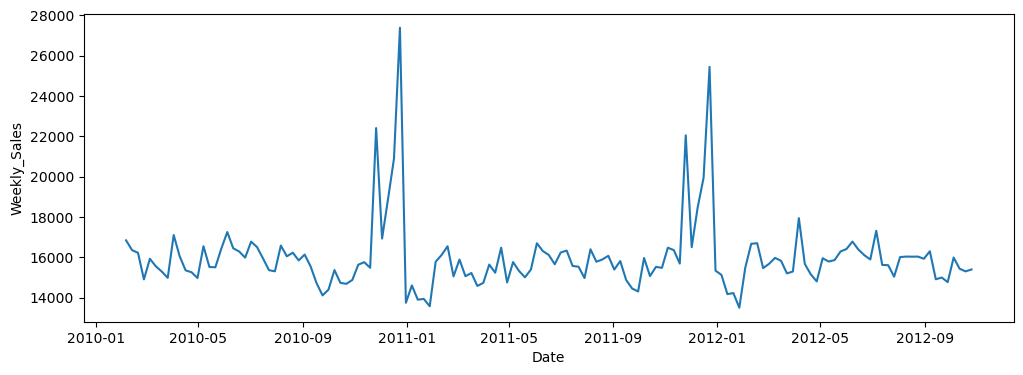

In [771]:
# 기간별 매출 추이
# 크리스마스 ~ 연말 시즌 2배 가까이 상승하는 것을 볼 수 있음
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x="Date", y="Weekly_Sales", ci=None)

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

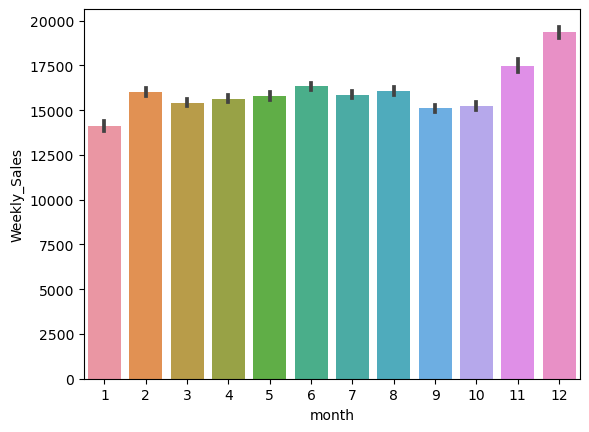

In [772]:
sns.barplot(data=train, x="month", y="Weekly_Sales")

In [ ]:
sns.barplot(data=train, x="year", y="Weekly_Sales")

In [ ]:
# 휴일 여부에 따른 매출은 큰 차이를 보이지 않음
sns.barplot(data=train, x="IsHoliday", y="Weekly_Sales")

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(data=train, x="Store", y="Weekly_Sales")

In [ ]:
# Type of Store (A, B, C)
# 알파벳 순으로 매출이 높음
sns.barplot(data=train, x="Type", y="Weekly_Sales")

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(data=train, x="Temperature", y="Weekly_Sales")

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(data=train, x="Fuel_Price", y="Weekly_Sales")

In [ ]:
sns.histplot(data=train, x="Size", y="Weekly_Sales", bins=30)

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x="CPI_interpolate", y="Weekly_Sales", ci=None)

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x="Unemployment_interpolate", y="Weekly_Sales", ci=None)

# X, y split

In [ ]:
label = "Weekly_Sales"

In [ ]:
features = train.columns.tolist()
features

In [ ]:
features = ['Store',
            'Dept',
#             'Date',
#             'Weekly_Sales',
            'IsHoliday',
            'Temperature',
            'Fuel_Price', 
            'MarkDown1', 
            'MarkDown2', 
            'MarkDown3', 
            'MarkDown4', 
            'MarkDown5',
#             'Type',
            'Size',
            'CPI_interpolate',
            'Unemployment_interpolate',
            'year',
            'month',
            'A',
            'B',
            'C']

In [ ]:
X_train = train[features]
print(X_train.shape)
X_train.head()

In [ ]:
y_train = train[label]
print(y_train.shape)
y_train.head()

In [ ]:
X_test = test[features]
print(X_test.shape)
X_test.head()

In [ ]:
# log1p[label]
y_train.describe()

In [ ]:
y_train

In [ ]:
y_train = y_train + 5000

In [ ]:
y_train.describe()

In [ ]:
y_train = np.log1p(y_train)
y_train[:5]

In [ ]:
y_train.describe()

# Model

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=13, max_features=0.8, n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf[:5]

# Score

In [ ]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(rf, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred[:5]

In [ ]:
sns.regplot(x=y_train, y=y_valid_pred)

In [ ]:
sns.regplot(x=np.expm1(y_train), y=np.expm1(y_valid_pred))

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_valid_pred)

## LGBM

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()

In [ ]:
lgbm.fit(X_train, y_train)

In [ ]:
y_pred_lg = lgbm.predict(X_test)
y_pred_lg[:5]

In [ ]:
y_valid_pred = cross_val_predict(lgbm, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred[:5]

In [ ]:
sns.regplot(x=y_train, y=y_valid_pred)

In [ ]:
cond = y_train < 4
y_train[cond]

In [ ]:
mean_squared_error(y_train, y_valid_pred)

# 제출

In [ ]:
submit = pd.read_csv("../data/MiniP4/sampleSubmission.csv.zip")
submit.head()

In [ ]:
y_pred_rf = np.expm1(y_pred_rf)
y_pred_rf[:5]

In [ ]:
submit["Weekly_Sales"] = y_pred_rf
submit.head()

In [ ]:
submit.to_csv("../data/MiniP4/submit.csv", index=False)

In [ ]:
pd.read_csv("../data/MiniP4/submit.csv")